# **Plan d’action**
---


## 1. Préparation et exploration initiale des données

## 2. Nettoyage et mise en forme ciblée

## 3. Analyse descriptive (EDA – Exploratory Data Analysis)


## 4. Encodage et préparation des variables pour analyses avancées

4.1 *Encodage des variables qualitatives :*
   - One-hot encoding ou label encoding (selon la pertinence).
   - Attention à la variable `main_accords` (multi-label possible).

4.2 **Gestion du nombre de dimensions :**
   - Le multi-label peut générer beaucoup de variables.
   - Utiliser la PCA pour réduire la dimension.

---

## 5. Analyses statistiques et multivariées

1. **Analyse descriptive approfondie (corrélations) :**
   - Corrélations (Pearson/Spearman) entre Launch_year, Rating_value, Rating_count.
   - Tests de chi2 ou corrélations entre variables qualitatives encodées.

2. **PCA (Analyse en Composantes Principales) :**
   - Visualiser l’organisation globale des parfums dans un espace réduit (2D ou 3D).
   - Identifier les variables qui contribuent le plus aux axes.

3. **Clustering :**
   - K-means ou clustering hiérarchique.
   - Sélection du nombre de clusters (méthode du coude, silhouette score).
   - Interprétation des groupes formés.

4. **Analyse prédictive (optionnel) :**
   - Construire un modèle de classification ou de régression (ex. prédire Rating_value).
   - Mesurer la performance (accuracy, recall, RMSE, etc.).

---

## 6. Interprétation et mise en perspective

1. **Synthèse des analyses descriptives :**
   - Parfums ou brandtachent par leurs caractéristiques.

2. **Résultats PCA et clustering :**
   - Groupements de parfums par accords, genre, année de lancement, etc.
   - Caractéristiques majeures de chaque cluster.

3. **Limites de l’étude :**
   - Données manquantes, biais de sélection (sites sources, etc.).
   - Absence d’informations sur le prix, ventes réelles, etc.

4. **Conclusions et pistes futures :**
   - Possibilité d’ajouter des variables supplémentaires (prix, notes textuelles).
   - Approfondir l’analyse temporelle, sentiment analysis, etc.

---

## 7. Documentation et présentation

1. **Organisation du code :**
   - Notebook propre, sections claires pour chaque étape.

2. **Visualisations :**
   - Graphiques pertinents (histogrammes, barplots, boxplots, biplots pour PCA).

3. **Rapport final (ex. LaTeX) :**
   - Introduction, méthodologie, résultats, discussion, conclusion.
   - Mise en avant des points clés et des perspectives.


# 1. **Préparation et exploration initiale des données OK**

---

## 1.1 **Inspection générale :**
   - Aperçu des premières lignes du dataset (head).
   - Dimension du tableau (nombre de lignes, nombre de colonnes).
   - Types de chaque variable (object, float, int, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
'FDS = Fragrantica Data Set'
FDS = pd.read_csv('Fragrantica_dataset.csv')
FDS.head()

,nom_parfum,marque,nose,launch_year,rating_value,rating_count,main_accords,gender,longevity,sillage,price_feeling,top_notes,middle_notes,base_notes,url
0,#Cool Vibes,Zara,NaN,2020.0,4.23,13,"['vanilla', 'fruity', 'sweet', 'citrus', 'powd...",female,very weak,NaN,ok,[],[],[],https://www.fragrantica.com/perfume/Zara/Cool-...
1,#Weekend Plan,Zara,NaN,2020.0,4.33,3,"['citrus', 'floral', 'fresh spicy', 'vanilla',...",NaN,NaN,NaN,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Weeke...
2,01 Magic Onsen,Zara,NaN,2017.0,3.29,38,"['musky', 'white floral', 'woody', 'powdery', ...",NaN,very weak,intimate,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/01-Ma...
3,02 Sweet Vanilla,Zara,NaN,2017.0,3.93,127,"['fruity', 'powdery', 'vanilla', 'woody', 'swe...",female,moderate,average,good value,"['Chestnut', 'Almond']",['Caramel'],"['Cedar', 'Vanilla', 'Musk']",https://www.fragrantica.com/perfume/Zara/02-Sw...
4,Amber Vanilla,Zara,NaN,NaN,4.23,35,"['amber', 'vanilla', 'powdery']",NaN,long lasting,average,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Amber...


In [2]:
print(f"Dimensions du dataset = {FDS.shape}")
#On veut que rating_count soit un entier
print(f"Nombre de rating_count vide = {FDS['rating_count'].isnull().sum()}")
FDS['rating_count'] = FDS['rating_count'].fillna(0)
FDS['rating_count'] = FDS['rating_count'].astype(str).str.replace(',', '').str.replace('.0', '')
FDS['rating_count'] = FDS['rating_count'].astype(int)

print(f"types de chaques variables = {FDS.dtypes}")


Dimensions du dataset = (19319, 15)
Nombre de rating_count vide = 653
types de chaques variables = nom_parfum        object
marque            object
nose              object
launch_year      float64
rating_value     float64
rating_count       int32
main_accords      object
gender            object
longevity         object
sillage           object
price_feeling     object
top_notes         object
middle_notes      object
base_notes        object
url               object
dtype: object


## 1.2 **Qualité des données :**
   - Détection des valeurs manquantes (NaN) par variable.
   - Proportion de données manquantes (par variable, par ligne).
   - Gestion de ces valeurs manquantes (suppression ou imputation selon la pertinence et le volume manquant).
   - Détection des doublons.

In [15]:
# Détection des valeurs manquantes et proportion de valeurs manquantes
print(f"Valeurs manquantes = {FDS.isnull().sum()}")
pourcentage = FDS.isnull().sum() / FDS.shape[0] * 100
print(f"Pourcentage de valeurs manquantes = {pourcentage}")

# Pour l'instant on garde tout

print(f"Nombre de doublons = {FDS.duplicated().sum()}")
# Pas de doublons

# On met tous les nomq de variables en anglais
FDS = FDS.rename(columns={'marque': 'brand'})
FDS = FDS.rename(columns={'nom_parfum': 'name'})

Valeurs manquantes = name                   0
brand                  1
nose               11598
launch_year         1822
rating_value         653
rating_count           0
main_accords           1
gender              6270
longevity           4494
sillage             3938
price_feeling       6708
top_notes              1
middle_notes           1
base_notes             1
url                    1
launch_period       1841
rating_category      653
dtype: int64
Pourcentage de valeurs manquantes = name                0.000000
brand               0.005176
nose               60.034163
launch_year         9.431130
rating_value        3.380092
rating_count        0.000000
main_accords        0.005176
gender             32.455096
longevity          23.262074
sillage            20.384078
price_feeling      34.722294
top_notes           0.005176
middle_notes        0.005176
base_notes          0.005176
url                 0.005176
launch_period       9.529479
rating_category     3.380092
dtype: float

## 1.3 **Exploration rapide des distributions :**
   - Pour les variables numériques (Launch_year, Rating_value, Rating_count) : histogrammes, statistiques descriptives (moyenne, médiane, etc.).
   - Pour les variables qualitatives (marque, nose, longevity, sillage, etc.) : tables de fréquences, comptages.


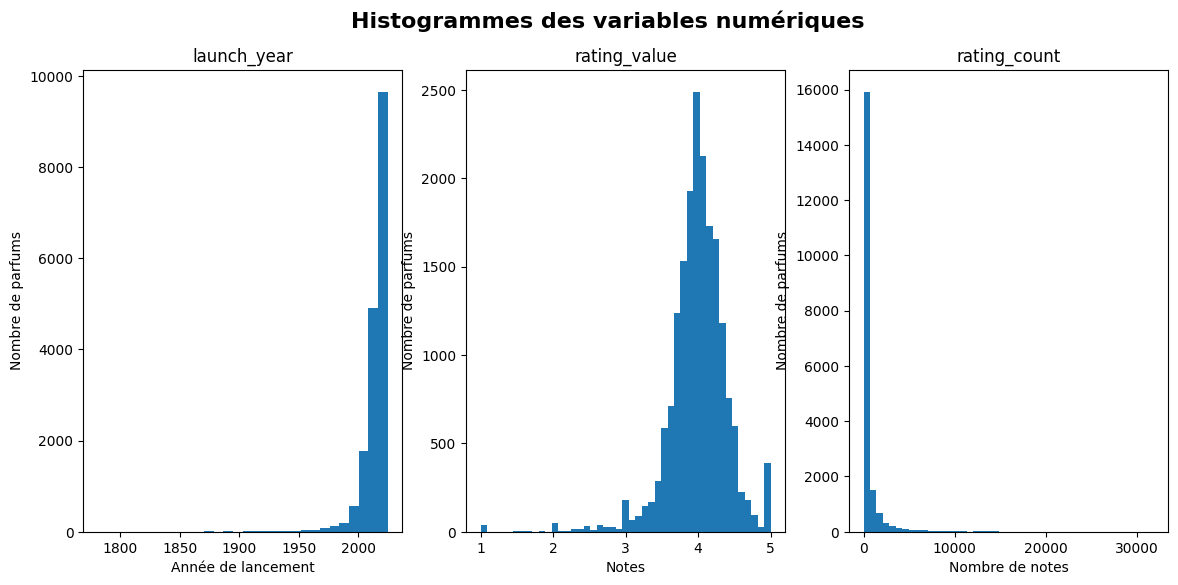

Statistiques descriptives des variables numériques : 
        launch_year  rating_value  rating_count
count  17497.000000  18666.000000  19319.000000
mean    2014.605132      3.993938    587.889953
std       11.963362      0.411205   1730.769492
min     1781.000000      1.000000      0.000000
25%     2012.000000      3.810000     19.000000
50%     2018.000000      4.010000     94.000000
75%     2021.000000      4.220000    408.500000
max     2025.000000      5.000000  31826.000000


In [4]:
#Variables numériques
launch_year = FDS['launch_year']
rating_count = FDS['rating_count']
rating_value = FDS['rating_value']

# histogrammes
plt.figure(figsize=(14,6))
plt.suptitle('Histogrammes des variables numériques', fontsize=16, fontweight='bold')


plt.subplot(1, 3, 1)
plt.hist(launch_year, bins=30)
plt.xlabel('Année de lancement')
plt.ylabel('Nombre de parfums')
plt.title('launch_year')

plt.subplot(1, 3, 2)
plt.hist(rating_value, bins=45)
plt.xlabel('Notes')
plt.ylabel('Nombre de parfums')
plt.title('rating_value')

plt.subplot(1, 3, 3)
plt.hist(rating_count, bins=45)
plt.xlabel('Nombre de notes')
plt.ylabel('Nombre de parfums')
plt.title('rating_count')

plt.show()

#Statistiques descriptives des variables numériques
print(f"Statistiques descriptives des variables numériques : \n{FDS.describe()}")

In [5]:
# Variables qualitatives
FDS_quali = FDS.select_dtypes(include='object').drop(columns=['url'])

# On va regarder les modalités de chaque variable qualitative
for col in FDS_quali.columns:
    print(f"Variable {col} :\n")
    print(f"Nombre de modalités : {FDS[col].nunique()}")
    print(f"Nombre de valeurs manquantes : {FDS[col].isnull().sum()}")
    print(f"Répartition des modalités : \n{FDS[col].value_counts(normalize=True)}")
    print("\n")

Variable name :

Nombre de modalités : 18637
Nombre de valeurs manquantes : 0
Répartition des modalités : 
name
Rose                0.000414
Vetiver             0.000362
Gold                0.000362
Love                0.000311
Cherry Blossom      0.000311
                      ...   
Jubilee Bouquet     0.000052
Kensington Amber    0.000052
Lavandula           0.000052
Levantium           0.000052
Oat & Cornflower    0.000052
Name: proportion, Length: 18637, dtype: float64


Variable brand :

Nombre de modalités : 148
Nombre de valeurs manquantes : 1
Répartition des modalités : 
brand
The Dua Brand        0.086344
Avon                 0.067864
Zara                 0.052749
Victoria's Secret    0.040998
Bath & Body Works    0.034320
                       ...   
YES I DO             0.000052
Cherry               0.000052
Chloe Eau Florale    0.000052
Quizás               0.000052
Next                 0.000052
Name: proportion, Length: 148, dtype: float64


Variable nose :

Nombre de mo

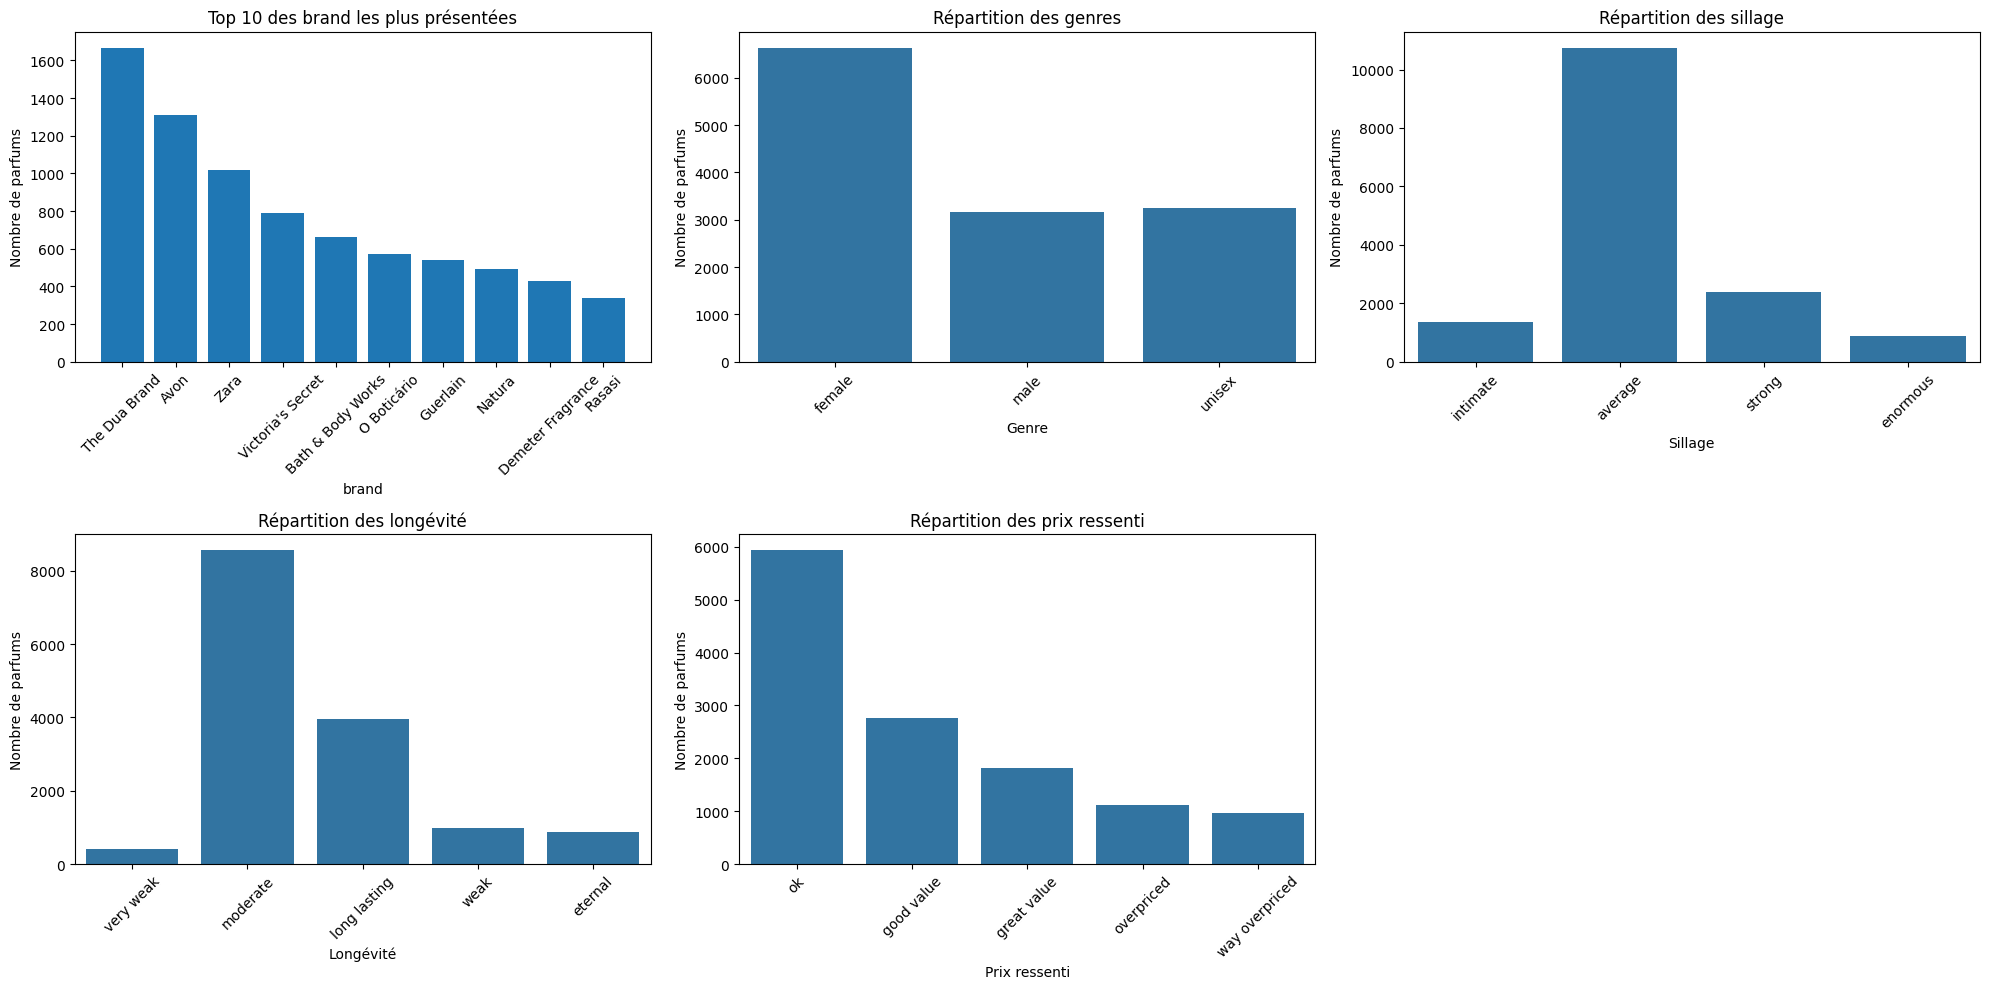

In [6]:
plt.figure(figsize=(20,10))
# brand
# Les 10 brand les plus représentées
top10_brand = FDS['brand'].value_counts().head(10)
plt.subplot(2, 3, 1)
plt.bar(top10_brand.index, top10_brand.values)
plt.title('Top 10 des brand les plus présentées')
plt.xlabel('brand')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# gender
# Répartition des genres
plt.subplot(2, 3, 2)
sns.countplot(data=FDS, x= FDS['gender'])
plt.title('Répartition des genres')
plt.xlabel('Genre')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# sillage
# Répartition des sillage
plt.subplot(2, 3, 3)
sns.countplot(data=FDS, x= FDS['sillage'])
plt.title('Répartition des sillage')
plt.xlabel('Sillage')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# longevity
# Répartition des longévité
plt.subplot(2, 3, 4)
sns.countplot(data=FDS, x= FDS['longevity'])
plt.title('Répartition des longévité')
plt.xlabel('Longévité')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

# price_feeling
# Répartition des prix ressenti
plt.subplot(2, 3, 5)
sns.countplot(data=FDS, x= FDS['price_feeling'])
plt.title('Répartition des prix ressenti')
plt.xlabel('Prix ressenti')
plt.ylabel('Nombre de parfums')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 2. **Nettoyage et mise en forme ciblée**
---

##  2.1 *Standardiser les variables qualitatives :*
   - Harmoniser l’orthographe des variables, etc.
   - Gérer les variations de casse (majuscules/minuscules).

In [ ]:
#On à déja mis le nom du toute les variables en anglais et à la m^me casse

## 2.2 *Traiter les variable `main_accords`,  `top_notes ` `middle_notes`,`base_note` qui sont des liste :* **POUR L'INSTANT RIEN N'EST FAIT**
   - Décider de la représenter en tant que chaîne de caractères (ex. concaténée par “;”) ou l’encoder (one-hot, multi-label).

## 2.3 *Segmentation éventuelle :*
   - Séparer l’année de lancement en périodes (ex. avant 2000, 2000-2010, etc.) pour des analyses comparatives.
   - Catégoriser ou agréger certaines variables si elles sont trop granulaires.

In [ ]:
# name --> OK
# brand --> Segmentention possibles : , par nombre de parfum, Par popularité, par type de parfum, par genre, par prix, ...
# nose --> Segmentation possibles : par nombre de parfum, par popularité, par genre, par prix, ...

#launch_year --> Créer une variable 'launch_period' par groupe de 5 année
FDS['launch_period'] = pd.cut(FDS['launch_year'],
                              bins=[1900, 1995,2000,2005,2010,2015,2020,2030],
                              labels=['Avant 1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2020', 'Après 2020'])
FDS['launch_period'].value_counts(normalize=True)

# rating value --> Créer une variable 'rating_category' en 3 catégories || On sépare après avoir regardé distrubtion des notes
FDS['rating_category'] = pd.cut(FDS['rating_value'],
                                bins=[0, 3.8, 4.2, 5],
                                labels=['Faible', 'Moyenne', 'Elevée'])
FDS['rating_category'].value_counts(normalize=True)

# rating count --> Pour créer une variable POPULARITY
FDS['popularity'] = pd.cut(FDS['rating_count'],
                           bins=[0, 100, 1000, 10000, 100000],
                           labels=['Très faible', 'Faible', 'Moyenne', 'Elevée'])
print(FDS['popularity'].value_counts(normalize=True))

# main_accord --> Sous forme de liste donc + difficile à segmenter
# gender --> OK
# sillage --> OK
# longevity --> OK
# price_feeling --> OK
# top_notes --> Sous forme de liste donc + difficile à segmenter
# heart_notes --> Sous forme de liste donc + difficile à segmenter
# base_notes --> Sous forme de liste donc + difficile à segmenter
# url --> OK



popularity
Très faible    0.495125
Faible         0.368102
Moyenne        0.129112
Elevée         0.007661
Name: proportion, dtype: float64


launch_period
Après 2020    0.324236
2015-2020     0.278121
2010-2015     0.183717
2005-2010     0.104303
2000-2005     0.045028
Avant 1995    0.040966
1995-2000     0.023630
Name: proportion, dtype: float64

## 2.4 *Détection d’anomalies :*
   - Valeurs extrêmes pour Rating_value, Launch_year (parfums trop anciens ou futurs).
   - Vérification de la cohérence générale.

In [52]:
#Cohérence des données
# brand
brand_mal_scrapee = FDS[FDS['brand'].map(FDS['brand'].value_counts()) <= 5]
print(f"La liste des parfums dont la marque n'est présente que 5 fois ou moins est : \n {brand_mal_scrapee[['name','brand']]}")
# Il y a eu des erreurs de scraping
print(f"\n \n Nombre de parfums dont la marque a donc mal été scrappée = {brand_mal_scrapee.shape[0]}")
'''
zara --> ZARA
Magnetic --> ZARA
Hypnotic --> ZARA
Quizas --> Loewe
Quizàs --> Loewe
Unless They're Crazy Hot --> By Kilian
don't be shy Anniversary Edition --> By Kilian
In The Bedroom --> By Kilian
Baby --> Victoria's Secret
Love --> Victoria's Secret
etc...
'''
liste_url_mal_scrapee = brand_mal_scrapee['url']
liste_url_mal_scrapee.to_csv('liste_url_mal_scrapee.csv', index=True)

# On les supprime du dataset et on les rajouteras au propre
FDS = FDS.drop(brand_mal_scrapee.index)
print(FDS.shape)

La liste des parfums dont la marque n'est présente que 5 fois ou moins est : 
 Empty DataFrame
Columns: [name, brand]
Index: []

 
 Nombre de parfums dont la marque a donc mal été scrappée = 0
(19289, 18)


In [23]:
# Détection des années incohérentes
current_year = 2025
anomalies_year = FDS[(FDS['launch_year'] < 1950) | (FDS['launch_year'] > current_year)]
print(f"Il y a {anomalies_year.shape[0]} valeurs extrêmes pour Launch_year")
print(f"Valeurs extrêmes pour Launch_year :\n{anomalies_year}")
# En vrai les formules datant d'avant 1950 n'ont rien à voir avec celle d'aujourd'hui
# On peut les retirer
FDS = FDS[(FDS['launch_year'] >= 1950) & (FDS['launch_year'] <= current_year)]

Il y a 100 valeurs extrêmes pour Launch_year
Valeurs extrêmes pour Launch_year :
                    name         brand                nose  launch_year  \
6332        English Fern  Penhaligon's                 NaN       1890.0   
6344    Blenheim Bouquet  Penhaligon's   Walter Penhaligon       1902.0   
6350      Hammam Bouquet  Penhaligon's  William Penhaligon       1872.0   
6405            Cornubia  Penhaligon's                 NaN       1910.0   
6406      Eau de Cologne  Penhaligon's                 NaN       1927.0   
...                  ...           ...                 ...          ...   
16599  Cotillion Cologne          Avon                 NaN       1934.0   
17593             Bolero          Avon                 NaN       1934.0   
18043            Diorama          Dior   Edmond Roudnitska       1948.0   
18153          Miss Dior          Dior         Jean Carles       1947.0   
18184   Miss Dior Parfum          Dior         Jean Carles       1947.0   

       rating_valu

# **3. Analyse descriptive (EDA – Exploratory Data Analysis)**
---

## 3.1 *Statistiques descriptives globales :*
   - Distribution de Launch_year (moyenne, médiane, écart-type, min, max).
   - Distribution de Rating_value, de Rating_count.

## 3.2 *Analyses de fréquences et répartition :*
   - brandreprésentées.
   - Parfumeurs (nose) les plus prolifiques.
   - Accords dominants (ex. “floral”, “woody”, “citrus”…) dans `main_accords`.
   - Répartition de `gender` (H/F/Unisex).
   - Longevity, Sillage (faible, modéré, fort, énorme, etc.).

## 3.3 *Visualisations :*
   - Histogrammes pour les variables numériques.
   - Diagrammes en barres pour les variables qualitatives.
   - Boxplots (ex. Rating_value par gender ou par main_accord principal).

---
